In [6]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import platform

In [22]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "malgun.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [23]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))  # 정규분포를 따르는 임의의 행렬 1000,3 만들기

# np.random.normal()  # 정규분포를 따르는 임의의 값을 가져오겠다.
# np.random.uniform()  # 균등 분포를 따르는 임의의 값을 가져오겠다.
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)

(1000, 3)
(3,)


In [24]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))  # 정규분포를 따르는 임의의 행렬 1000,3 만들기

# np.random.normal()  # 정규분포를 따르는 임의의 값을 가져오겠다.
# np.random.uniform()  # 균등 분포를 따르는 임의의 값을 가져오겠다.
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)

(1000, 3)
(3,)


In [25]:
# 포아송 분포를 따르는 값 
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("X, w : ", X.shape, w.shape)
print("y : ", y.shape)
print(X[:, 0])

X, w :  (1000, 3) (3,)
y :  (1000,)
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33   9   6  30   7
  25  27  40  15   2   5   7   3   5  42  10   7  87   5  19   4  24   8
  10  11   2   9   2   7   1   0   4   8  32   2  11  16   2   5   1   8
  13  19  13  68   2  21  20  12  10  16   5   7   1   3   1   9  10   3
   4 112  26   3   3  45   7  11  18   2   4   3  11  13  10   2  28  10
   8  14  14   3  23   3  24  28  18  17  13  27  56  10  23  11  24   5
  34  13  28   0  32   5   1  12   6  14   8  84   1   5  45   1  22   9
  47  14  29   9   2   9  10   1  25   2  17  60   0   6   0  12   0  10
  11  51  31   3  22  36   2  14   4  19  16  24   8  27   2   5   6  17
  11   6   1   9  15   5  25  15  21   8   8  53   6   4   4  38  28   5
   6   1  12   4   5  17   5  21   3  16  53  34   9   1  15   2   8  29
   1  84  36  2

In [26]:
### 각 값이 가지는 것에 대해 확인해 보기
print("값 출현 횟수(0~) :\n",np.bincount(X[:,0]))

값 출현 횟수(0~) :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


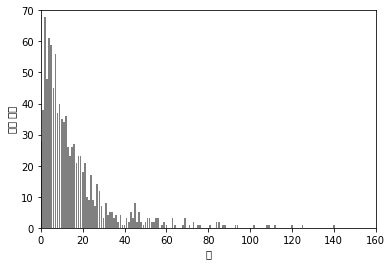

In [27]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

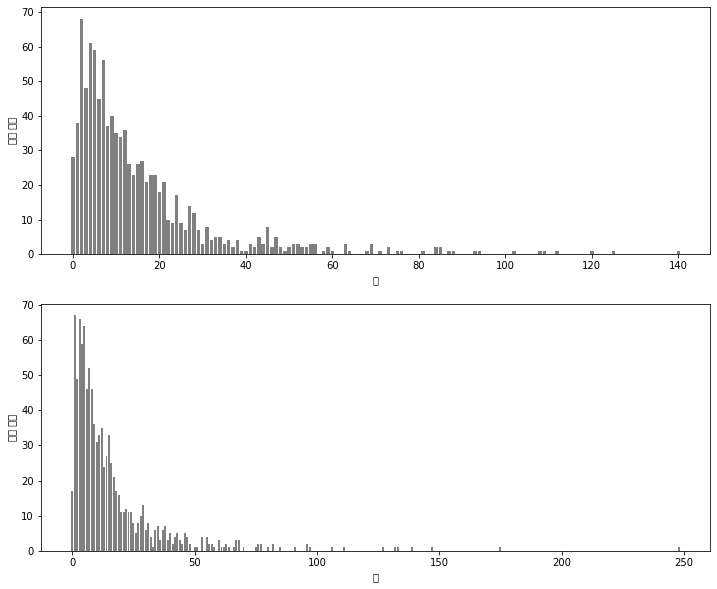

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = Ridge().fit(X_train, y_train)
model.score(X_test, y_test)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#score = Ridge().fit(X_train, y_train).score(X_test, y_test)
#print("테스트 점수 : {:.3f}".format(score))

0.6224186236310756

In [31]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값(log적용)')

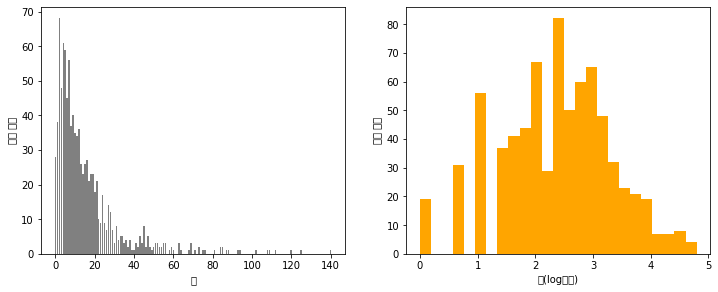

In [32]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [33]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875
